In [82]:
import kagglegym
import numpy as np
import pandas as pd

# sklearn libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

pd.set_option('display.max_columns', 120)

In [87]:



environment = kagglegym.make() # This creates an environment in the API for me to play in
observation = environment.reset() # Resets to first observations "view of what you can see presently"

excl = [environment.ID_COL_NAME, environment.TARGET_COL_NAME, environment.TIME_COL_NAME,
environment.SAMPLE_COL_NAME]
col = [c for c in observation.train.columns if c not in excl]

from scipy import stats

df_old = observation.train
df = df_old[(np.abs(stats.zscore(df_old["y"])) < 3.6)]
#df = observation.train
df_full = pd.read_hdf('../input/train.h5')
d_mean= df[col].median(axis=0)


min_y = df["y"].min()
max_y = df["y"].max()
print (min_y, max_y)

X_train =df[col]
n = X_train.isnull().sum(axis=1)

for c in col: 
    r = pd.isnull(X_train.loc[:, c])
    X_train[c + '_nan_'] = r  
    d_mean[c + '_nan_'] = 0                                     

X_train = X_train.fillna(d_mean)
df = df.fillna(d_mean)
X_train['znull'] = n 
n = []

cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']
"""['technical_30', 'technical_20', 'fundamental_11', 'technical_27', 'technical_19', 'technical_35',
'technical_11', 'technical_2', 'technical_34', 'fundamental_53', 'fundamental_51',
'fundamental_58']"""


"['technical_30', 'technical_20', 'fundamental_11', 'technical_27', 'technical_19', 'technical_35',\n'technical_11', 'technical_2', 'technical_34', 'fundamental_53', 'fundamental_51',\n'fundamental_58']"

So there are 111 columns present in the dataset.
1 id column
1 timestamp column
5 columns with name prefix 'derived'
63 columns with name prefix 'fundamental' - fundamental_0 to fundamental_63 - 'fundamental_4' is missing. Any specific reasons?
40 columns with name prefix 'technical' - technical_0 to technical_44 - technical_4, technical_8, technical_15, technical_23, technical_26 are missing.
1 target variable named 'y'

In [2]:
df.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,7.933940e+05,793394.000000,7.933940e+05,793394.000000,7.933940e+05,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,7.933940e+05,793394.000000,793394.000000,793394.000000,793394.000000,7.933940e+05,7.933940e+05,7.933940e+05,793394.000000,793394.000000,7.933940e+05,7.933940e+05,793394.000000,793394.000000
mean,1090.397299,472.382972,-8.991772,3.000006e+11,-0.857955,-0.825569,35.403271,-0.007330,-1.233244e+09,-0.225199,0.011090,0.667681,0.054669,104.876892,0.029946,0.040213,0.309623,-0.332534,8.861669,0.075439,4.395462,0.159181,-0.196340,1.641531e+14,-0.447836,0.360459,-4.490608,0.128629,0.065696,39.460678,0.097034,0.066962,4.786469e+02,4.357104,0.020395,0.169036,0.072539,0.025715,3.520493,1.305791e+03,1.320298,0.339455,57.710106,0.112775,-0.030445,0.203853,0.002459,2.853942e+03,3.369731e+03,0.265315,0.196104,4.411839,0.113711,0.038275,-0.143525,0.260684,17.799173,0.040484,0.213401,-0.102910,0.194323,-0.133509,-0.012486,0.085084,0.023064,0.152072,0.171096,2.034215e+12,-0.033404,0.157592,-1.114957e-01,0.000565,-0.891376,0.001891,0.000863,-0.910640,0.003913,-2.508686e-02,-7.431719e-01,-0.893326,-1.835631e-01,0.000302,-9.001687e-01,-0.006565,-0.894576,-3.746332e-02,-0.026282,0.001393,0.000645,-0.012077,0.002703,0.000621,-0.042881,0.000417

In [3]:
print('Number of rows: {}, Number of columns: {}'.format(*df.shape))

cols = [0, 0, 0]
for c in df.columns:
    if 'derived' in c: cols[0] += 1
    if 'fundamental' in c: cols[1] += 1
    if 'technical' in c: cols[2] += 1
print('Derived columns: {}, Fundamental columns: {}, Technical columns: {}'.format(*cols))
print('\nColumn dtypes:')
print(df.dtypes.value_counts())
print('\nint16 columns:')
print(df.columns[train_one.dtypes == 'int16'])
yellow = [len(df.id.unique()), len(df.timestamp.unique()) ]
print('We are tracking {} unique assets over {} periods.'.format(*yellow))


# I love this piece of code, it gives you a quick count of the type of columns. 


Number of rows: 793394, Number of columns: 111
Derived columns: 5, Fundamental columns: 63, Technical columns: 40

Column dtypes:
float32    109
int16        2
dtype: int64

int16 columns:


NameError: name 'train_one' is not defined

Looks like we have 1,424 assets that we are tracking across 1,813 time periods. We can't make any assumptions about the time period length - it could be days, hours, minutes, etc. as long as the period is uniform.
The set of assets could be considered as the market portfolio. It would be interesting to see if these assets could be grouped into classes based on the observed data and features. For example, asset classes may be equities, bonds, etc.
One approach may be to determine market return for a specific time period, and based on that predict the expected return of each asset based on autocorrelation and on how the asset returns correlate to market returns, given an asset class and other features.
For now let's try to visualize the market return over the time period.

In [4]:
# Wow, this is some of the most beautiful code that I have seen in a long time

market_df = df_full[['timestamp', 'y']].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()
market_df.head()


timestamp         y                 
                 mean       std    len
0         0 -0.001870  0.026646  750.0
1         1  0.000501  0.028422  750.0
2         2 -0.005787  0.029281  750.0
3         3  0.001633  0.025333  750.0
4         4 -0.004309  0.035929  750.0

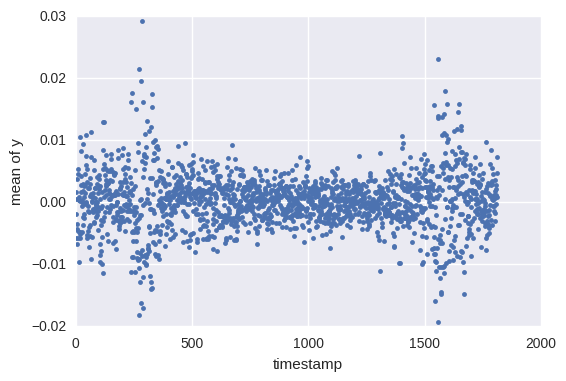

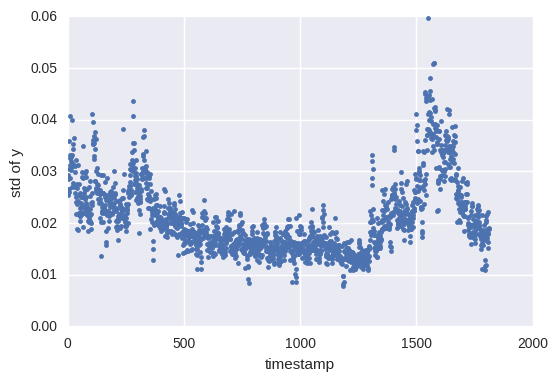

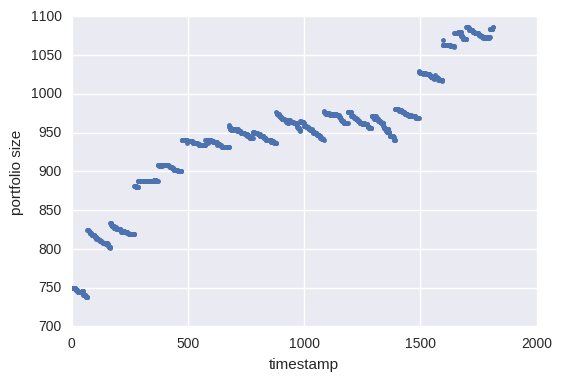

In [5]:
t      = market_df['timestamp']
y_mean = np.array(market_df['y']['mean'])
y_std  = np.array(market_df['y']['std'])
n      = np.array(market_df['y']['len'])

# These scatter plots are very similar to the histograms that I have further down. 

# This one below shows similar information to what I already have somewhere else. 
plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('timestamp')
plt.ylabel('mean of y')

# Std shows a similar picture to the one above. 
plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('timestamp')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('timestamp')
plt.ylabel('portfolio size')

Looks like two periods of high variance that are correlated with rapid increases in the number of assets. The number of assets being tracked increases from 750 in the first timestamp to just under 1100 in the last.
The total number of assets across all timestamps is 1424, so some assets are being dropped as well. It looks like assets are added to the portfolio periodically (see the gaps in the chart), and sold off more slowly.
Let's derive a price chart for these returns. We can take the log of the periodic mean returns and get a cumulative sum for each time period to derive a fairly good approximation of a price chart for the portfolio.

**Of course this makes sense they provided ius with a portfolio of stocks**

In [6]:
n=-3
y_mean

array([-0.00187   ,  0.00050067, -0.00578675, ...,  0.00732573,
        0.00471032,  0.00083468], dtype=float32)

In [7]:
cum_ret = np.log(1+y_mean).cumsum()

#ln(1+ret) = is going to give you return. 

# log(1 + r_i) = log(\frac{p_i}{p_j}) = \log(p_i) - log(p_j) 


#cum_ret = np.array(1+y_mean)*(y_mean[-n]).cumsum()
#fuck yea nb, go length for for loop, if you do not want ot go into the elements.
# Even more important range seems to be the important one

#for n in range(len(y_mean)):
#    cum_new = (1+y_mean[n])*(y_mean[n+1])

# This above is definitely wrong.
#.cumsum()
#cum_ret
cum_ret


array([-0.00187173, -0.00137117, -0.00717476, ...,  0.37244943,
        0.37714869,  0.37798303], dtype=float32)

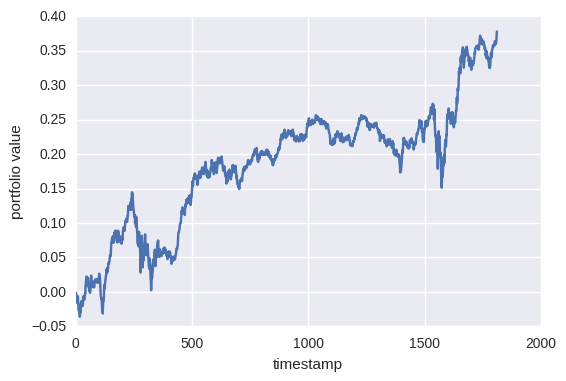

In [8]:
plt.figure()
plt.plot(t, cum_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

Taking the log returns and adding them up is a good approximation for the compounding of returns.
I tried the right method, but I fucked it up.


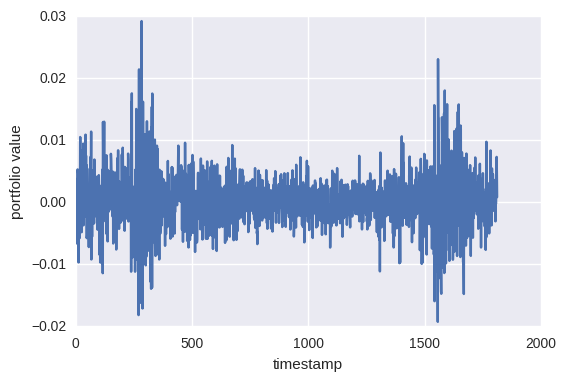

In [17]:
plt.figure()
plt.plot(t, y_mean)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

In [10]:
assets_df = df.groupby('id')['y'].agg(['mean','std',len]).reset_index()
assets_df.head()

,id,mean,std,len
0,0,0.000189,0.014752,738.0
1,7,0.000471,0.014180,636.0
2,10,-0.000879,0.022461,112.0
3,11,-0.000023,0.013463,905.0
4,12,0.000211,0.014235,906.0


In [11]:
assets_df = assets_df.sort_values(by='mean')
assets_df.head()

,id,mean,std,len
721,1431,-0.016203,0.040820,12.0
822,1637,-0.013827,0.035911,167.0
562,1118,-0.012367,0.036825,95.0
411,807,-0.011554,0.039748,112.0
984,1950,-0.010029,0.035501,58.0


In [12]:
assets_df.tail()

,id,mean,std,len
793,1578,0.005461,0.015071,25.0
420,824,0.007304,0.037208,69.0
646,1276,0.007393,0.051039,11.0
366,705,0.007922,0.021639,25.0
714,1415,0.008357,0.020797,25.0


In [13]:
assets_df.describe()

,id,mean,std,len
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,1082.892336,0.000026,0.018206,723.899658
std,630.366305,0.001580,0.006447,273.148682
min,0.000000,-0.016203,0.006512,8.000000
25%,541.500000,-0.000273,0.013185,634.000000
50%,1085.500000,0.000202,0.016673,881.000000
75%,1636.250000,0.000604,0.022054,903.000000
max,2156.000000,0.008357,0.051039,906.000000


Looks like individual asset returns range from a min of -0.035077 to a high of 0.010827, with a mean return of 0.000186 and a std dev of 0.001884.
Assets have a mean holding period of roughly 1201 periods with a std dev of 646 periods, with a min holding period of 2 and a max of 1813 (all periods).

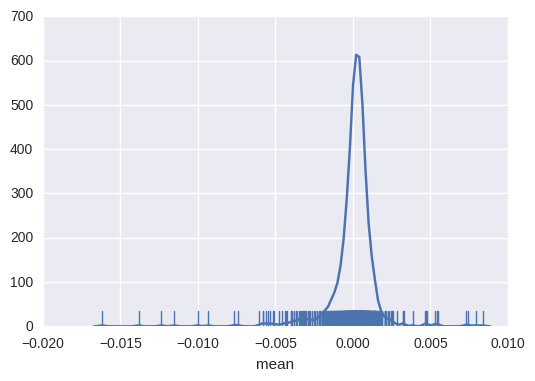

In [14]:
sns.distplot(assets_df['mean'], rug=True, hist=False)

In [15]:
assets_df.corr()

,id,mean,std,len
id,1.000000,-0.001341,-0.003456,0.031581
mean,-0.001341,1.000000,-0.381263,0.115385
std,-0.003456,-0.381263,1.000000,-0.111491
len,0.031581,0.115385,-0.111491,1.000000


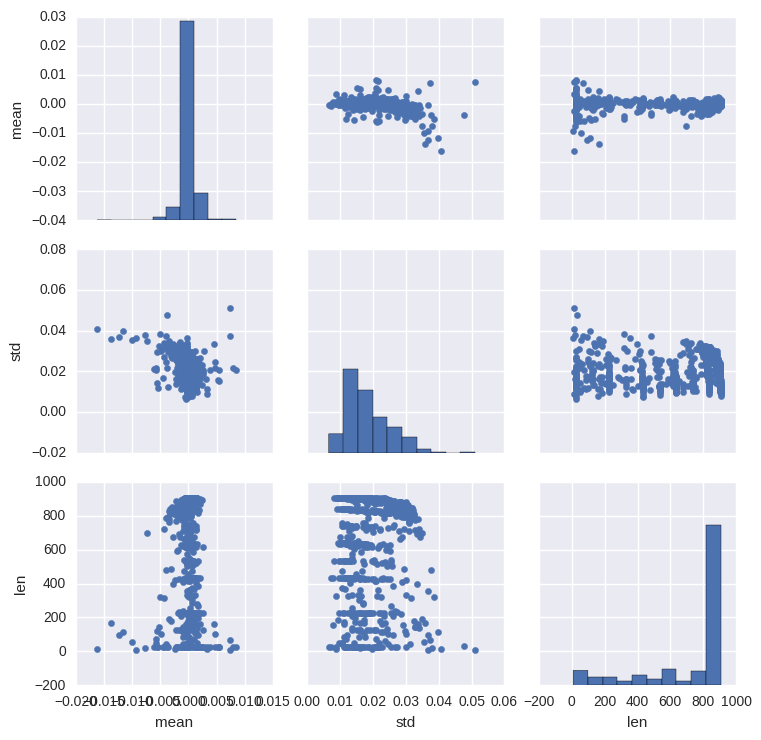

In [16]:
g = sns.PairGrid(assets_df, vars=["mean", "std", "len"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

There seem to be some interesting relationships here. Notably, mean asset returns and holding period are negatively correlated with the std dev of returns.
Thanks for visiting! Next I'm going to look at time series of individual asset return and correlation with the portfolio returns...


In [18]:
corr = df.iloc[:,2:-1].corrwith(df.y)
print('max_correlation', corr.max().max())
print('min_correlation', corr.min().min())

max_correlation 0.0127128012193
min_correlation -0.0258297005338


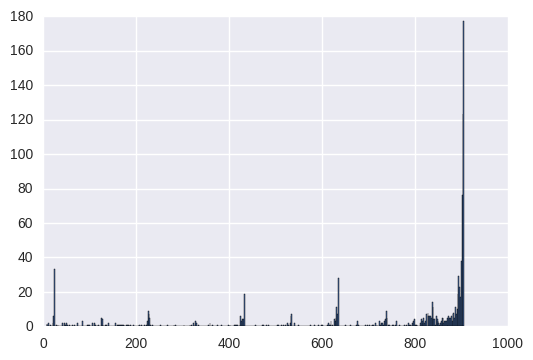

In [19]:
df.groupby('id').size().hist(bins=500)
# This shows you how much timestamps there is per id.
# Remember that there is about 1000 unique ids


In [20]:
# This is actually so weitd that there is that many for each.
df_full.groupby('id').size().value_counts().head(5)

1813    527
320      60
1745     57
218      52
1543     51
dtype: int64

In [21]:
# It seems that stuff that I cut away took a lot of the frequent occuring
# assets

In [22]:
df.groupby('id').size().value_counts().head(5)

906    105
905     72
904     62
903     61
902     42
dtype: int64

In [26]:
size = df_full.groupby('id').size()
print(len(size), max(size))
assets = size[size==1813].index.values
print(len(assets))

correlations = pd.DataFrame()

for asset in assets:
    
    df2 = df_full[df_full.id==asset]
    corr = df2.drop(['id', 'timestamp', 'y'], axis=1).corrwith(df2.y)
    correlations[asset] = corr

correlations.head()


,11,12,25,26,31,38,39,40,41,43,44,54,59,60,68,76,79,80,82,83,87,95,98,113,118,121,124,128,130,132,140,142,152,154,156,160,172,175,176,184,186,187,191,195,199,203,206,215,216,217,219,223,224,225,229,232,235,240,242,244,...,1935,1951,1952,1954,1956,1957,1963,1966,1969,1970,1972,1975,1976,1979,1981,1990,1992,2000,2001,2008,2021,2030,2033,2036,2037,2043,2044,2047,2050,2054,2056,2057,2062,2065,2069,2070,2074,2078,2079,2080,2083,2089,2092,2095,2100,2101,2104,2108,2109,2114,2126,2129,2131,2138,2142,2146,2148,2149,2154,2156
derived_0,0.004363,0.013156,-0.017381,-0.038954,-0.049455,-0.011881,0.022028,-0.006472,0.012577,-0.004026,-0.025767,0.039720,0.017870,-0.013690,0.006880,0.002873,0.029383,-0.017735,0.038252,0.008852,0.001790,0.040850,-0.057739,0.003360,0.026435,-0.011006,-0.034292,0.021602,0.007243,0.007401,0.010750,-0.005356,-0.013938,0.003354,-0.005427,0.019376,-0.021768,0.008910,0.005206,0.015738,0.004799,0.010661,0.025030,0.021695,-0.036572,0.002998,0.014115,-0.002513,0.021035,0.004075,0.001445,0.010876,0.008993,0.014411,-0.008386,0.024619,0.008616,0.029631,-0.046567,-0.003598,...,-0.040927,0.009790,-0.016890,0.003987,0.024092,-0.016405,-0.007050,0.009239,0.003482,0.002113,0.026159,0.001547,-0.011814,-0.014689,-0.010987,0.007366,0.017367,0.006722,0.017468,-0.001902,0.025241,0.002130,-0.013357,-0.003078,0.004010,-0.000521,0.020027,0.006303,-0.025563,0.006359,0.017372,0.011164,0.017131,0.013623,-0.023948,-0.021654,0.010319,-0.016786,0.022608,0.021325,0.002363,0.020519,0.010487,0.003425,0.012263,-0.033078,-0.022492,0.001429,-0.009895,-0.025406,0.001405,0.004210,-0.019971,-0.000109,0.015152,-0.001035,0.016060,0.001642,-0.014174,0.005973
derived_1,-0.015384,-0.027269,-0.012106,-0.012848,0.041687,0.001637,0.008188,-0.008629,-0.028765,-0.013939,-0.003989,-0.031491,-0.020845,-0.006848,-0.004617,0.000643,-0.029266,-0.006528,0.008748,-0.015099,0.005028,0.027559,0.024247,-0.001321,0.004952,0.012842,0.006531,0.028419,0.020976,0.014152,0.013865,-0.016595,-0.016163,0.007490,-0.006205,-0.013187,0.003706,-0.009720,-0.000104,0.009821,-0.005654,0.006303,0.037883,0.029722,0.011666,0.002631,-0.006830,0.009867,0.017493,-0.013579,-0.008509,0.005540,0.008025,0.032888,0.010000,-0.000864,-0.031138,0.019317,0.047643,0.029173,...,0.027393,0.000702,0.042096,-0.007728,0.002197,0.021602,0.015868,0.033860,-0.003747,0.018712,0.034969,0.024804,-0.024866,0.009046,0.027024,0.028969,-0.012500,-0.000749,0.030670,-0.019584,-0.003594,0.004426,0.016794,0.028590,0.011941,0.030016,-0.003916,-0.009508,0.029240,0.021952,0.029909,0.000680,-0.009811,-0.003030,0.038975,0.016126,0.005636,0.005669,0.006717,-0.005178,0.037966,0.007622,-0.001863,0.004551,0.030519,0.043311,-0.018407,0.007846,0.044931,0.030659,0.029661,0.011963,0.011090,-0.005313,0.015301,0.007930,0.004590,-0.001696,-0.009549,0.018409
derived_2,-0.010113,0.024922,0.001815,0.003076,NaN,0.007301,0.007242,-0.007721,-0.008008,-0.007719,-0.011425,NaN,0.012188,-0.022014,-0.016148,-0.010683,-0.000763,-0.019976,NaN,0.033733,-0.001364,0.001221,-0.012249,NaN,-0.025558,0.020568,-0.009911,0.027519,-0.007815,0.001780,-0.005576,-0.017962,0.009337,NaN,-0.017348,0.035866,-0.008719,0.013751,-0.010644,0.010867,NaN,-0.006303,-0.024551,0.018535,0.002876,NaN,NaN,-0.005303,0.009369,0.004117,0.001357,-0.010754,0.008227,0.000266,0.014004,NaN,-0.004379,0.015508,-0.045561,0.006257,...,0.071107,NaN,0.018368,-0.009079,0.014997,-0.002766,NaN,0.041666,0.030661,-0.037897,NaN,-0.011004,-0.027701,-0.015520,-0.014801,0.025616,-0.005002,-0.018795,-0.017546,0.019213,-0.010655,-0.000978,0.027358,NaN,NaN,0.005617,NaN,-0.042365,0.045085,0.011321,NaN,NaN,0.003826,NaN,NaN,0.021735,0.009166,-0.029463,-0.020587,-0.000811,0.021483,0.033022,-0.018453,0.010157,0.021862,0.010002,-0.018920,NaN,0.001496,0.055194,0.023690,NaN,-0.006281,0.011483,0.007194,0.004534,0.012810,-0.004328,-0.012052,NaN
derived_3,-0.012139,-0.030383,0.015066,-0.032857,-0.059478,-0.025262,0.009551,-0.027504,-0.030710,0.000171,-0.019791,-0.009653,-0.019535,-0.001594,0.016798,0.012013,-0.02

From this we can see that NaN values are present in all columns but two  (tech_22 & 34)

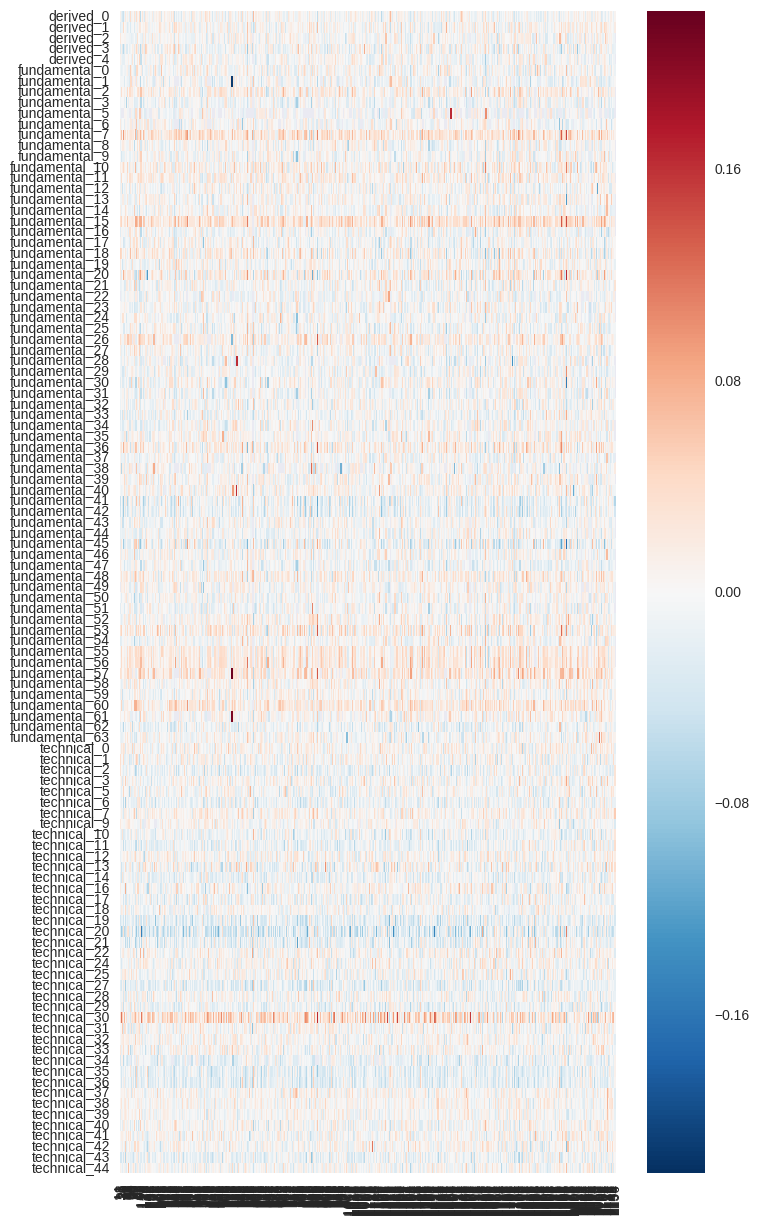

In [27]:
plt.figure(figsize=(8,15))
sns.heatmap(correlations, vmin=-0.22, vmax=0.22)

In [32]:
def get_reward(y_true, y_fit):
    R2 = 1 - np.sum((y_true - y_fit)**2) / np.sum((y_true - np.mean(y_true))**2)
    R = np.sign(R2) * math.sqrt(abs(R2))
    return(R)

In [ ]:
# Some pre-processing as seen from most of the public scripts.
# The "environment" is our interface for code competitions

# observation = env.reset()

# We get our initial observation by calling "reset


In [85]:
observation = environment.reset()
cols_to_use_one = ['technical_20']

# model build
rid = Ridge()
fit_three = rid.fit(np.array(df[cols_to_use].values), df["y"].values)

# getting the y mean dict for averaging
ymean_dict = dict(observation.train.groupby(["id"])["y"].mean())

# weighted average of model & mean
def get_weighted_y(series):
    id, y = series["id"], series["y"]
    return 0.95 * y + 0.05 * ymean_dict[id] if id in ymean_dict else y

y_actual_list = []
y_pred_list = []
r1_overall_reward_list = []
ts_list = []
while True:
    timestamp = observation.features["timestamp"][0]
    actual_y = list(df_full[df_full["timestamp"] == timestamp]["y"].values)
    observation.features.fillna(d_mean, inplace=True)
    test_x = np.array(observation.features[cols_to_use].values)
    observation.target.y = fit_three.predict(test_x).clip(min_y, max_y)
    
    ## weighted y using average value
    observation.target.y = observation.target.apply(get_weighted_y, axis = 1)
    target = observation.target
    observation, reward, done, info = environment.step(target)
    
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
    
    pred_y = list(target.y.values)
    y_actual_list.extend(actual_y)
    y_pred_list.extend(pred_y)
    overall_reward = get_reward(np.array(y_actual_list), np.array(y_pred_list))
    r1_overall_reward_list.append(overall_reward)
    ts_list.append(timestamp)
    if done:
        break
    
print(info)






Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800
{'public_score': 0.017009159887100535}


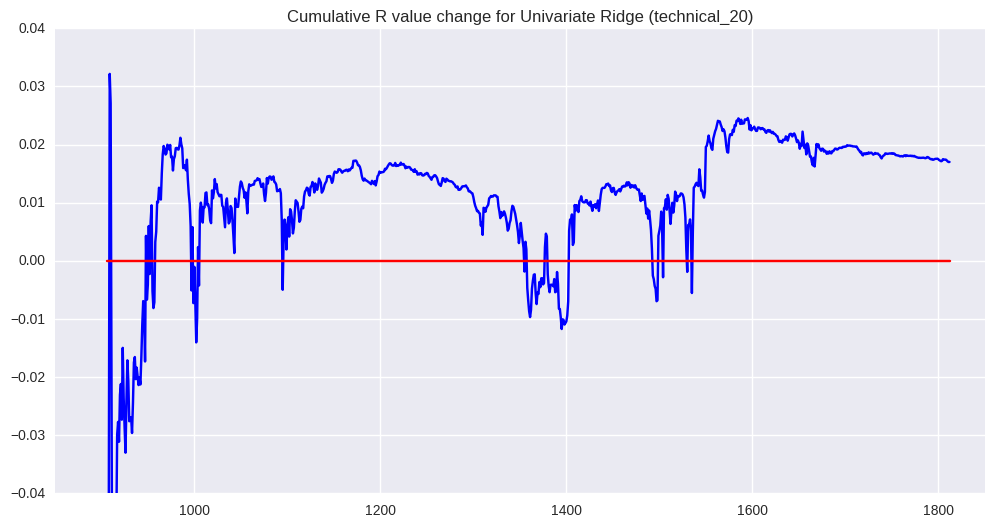

In [86]:
fig = plt.figure(figsize=(12, 6))
plt.plot(ts_list, r1_overall_reward_list, c='blue')
plt.plot(ts_list, [0]*len(ts_list), c='red')
plt.title("Cumulative R value change for Univariate Ridge (technical_20)")
plt.ylim([-0.04,0.04])
plt.xlim([850, 1850])
plt.show()

In [74]:
observation = environment.reset()
cols_to_use_two = ['technical_20', 'technical_30', 'fundamental_15'] 
# model build
rid = Ridge()
fit_four = rid.fit(np.array(df[cols_to_use_two].values), df["y"].values)

# getting the y mean dict for averaging
ymean_dict = dict(observation.train.groupby(["id"])["y"].mean())

# weighted average of model & mean
def get_weighted_y(series):
    id, y = series["id"], series["y"]
    return 0.95 * y + 0.05 * ymean_dict[id] if id in ymean_dict else y

y_actual_list = []
y_pred_list = []
r3_overall_reward_list = []
ts_list = []
while True:
    timestamp = observation.features["timestamp"][0]
    actual_y = list(df_full[df_full["timestamp"] == timestamp]["y"].values)
    observation.features.fillna(d_mean, inplace=True)
    test_x = np.array(observation.features[cols_to_use_two].values)
    observation.target.y = fit_four.predict(test_x).clip(min_y, max_y)
    
    ## weighted y using average value
    observation.target.y = observation.target.apply(get_weighted_y, axis = 1)
    target = observation.target
    observation, reward, done, info = environment.step(target)
    
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
    
    pred_y = list(target.y.values)
    y_actual_list.extend(actual_y)
    y_pred_list.extend(pred_y)
    overall_reward = get_reward(np.array(y_actual_list), np.array(y_pred_list))
    r3_overall_reward_list.append(overall_reward)
    ts_list.append(timestamp)
    if done:
        break
    
print(info)


Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800
{'public_score': 0.016871036919176782}


TypeError: unsupported operand type(s) for -: 'list' and 'list'

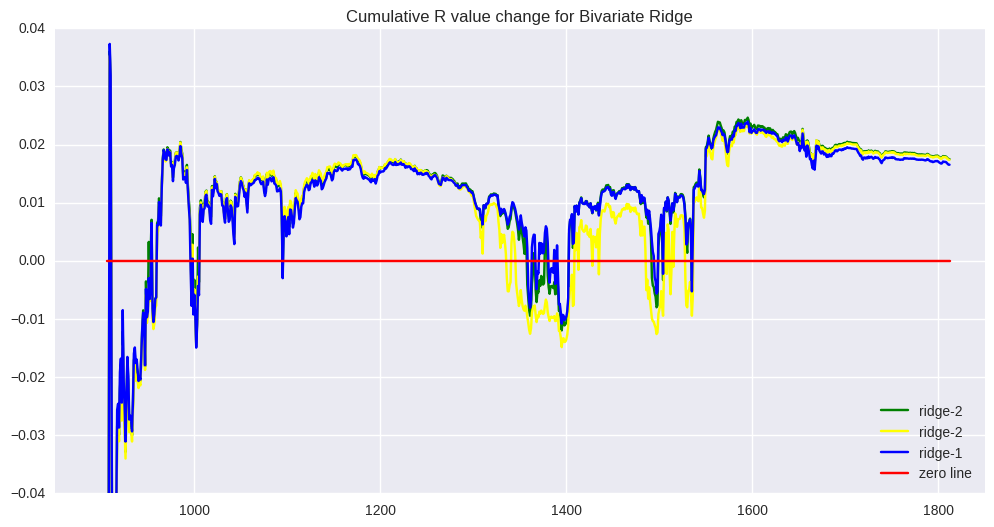

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ts_list, r2_overall_reward_list, c='green', label='ridge-2')
ax.plot(ts_list, r3_overall_reward_list, c='yellow', label='ridge-2')
ax.plot(ts_list, r1_overall_reward_list, c='blue', label='ridge-1')
ax.plot(ts_list, [0]*len(ts_list), c='red', label='zero line')
ax.legend(loc='lower right')
ax.set_ylim([-0.04,0.04])
ax.set_xlim([850, 1850])
plt.title("Cumulative R value change for Bivariate Ridge")
plt.show()

Above is trivariate, it is not univariate, because that means one variable 

In [99]:
##===================>>>>>>>>> First Reset
environment = kagglegym.make()
observation = environment.reset()

excl = [environment.ID_COL_NAME, environment.SAMPLE_COL_NAME, environment.TARGET_COL_NAME, environment.TIME_COL_NAME]
col = [c for c in observation.train.columns if c not in excl]

train = observation.train[col]
d_mean= train.median(axis=0)

train = observation.train[col]
n = train.isnull().sum(axis=1)
for c in train.columns:
    train[c + '_nan_'] = pd.isnull(train[c])
    d_mean[c + '_nan_'] = 0
train = train.fillna(d_mean)
train['znull'] = n

rfr = ExtraTreesRegressor(n_estimators=20, max_depth=4, n_jobs=-1, random_state=123, verbose=0)
#fit_one = rfr.fit(X_train, df["y"].values)
fit_one = rfr.fit(train, observation.train['y'])

ymean_dict = dict(observation.train.groupby(["id"])["y"].mean())
def get_weighted_y(series):
    id, y = series["id"], series["y"]
    return 0.95 * y + 0.05 * ymean_dict[id] if id in ymean_dict else y

y_actual_list = []
y_pred_list = []
et_b_overall_reward_list = []
ts_list = []

while True:
    timestamp = observation.features["timestamp"][0]
    actual_y = list(df_full[df_full["timestamp"] == timestamp]["y"].values)
    
    test = observation.features[col]
    n = test.isnull().sum(axis=1)
    for c in test.columns:
        test[c + '_nan_'] = pd.isnull(test[c])
    test = test.fillna(d_mean)
    test['znull'] = n
    
    pred = observation.target
    pred['y'] = fit_one.predict(test).clip(-0.086093, 0.093497) 
    # The above didn't cause to much change. 
   
    pred['y'] = pred.apply(get_weighted_y, axis = 1)
    observation, reward, done, info = environment.step(pred[['id','y']])
    
    pred_y = list(pred.y.values)
    y_actual_list.extend(actual_y)
    y_pred_list.extend(pred_y)
    overall_reward = get_reward(np.array(y_actual_list), np.array(y_pred_list))
    et_b_overall_reward_list.append(overall_reward)
    ts_list.append(timestamp)
    
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
    
    if done:
        print(info)
        break




/opt/conda/bin/ipython:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/bin/ipython:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Timestamp #1000
Timestamp #1100
Timestamp #1200
Timestamp #1300
Timestamp #1400
Timestamp #1500
Timestamp #1600
Timestamp #1700
Timestamp #1800
{'public_score': 0.020877894695250199}


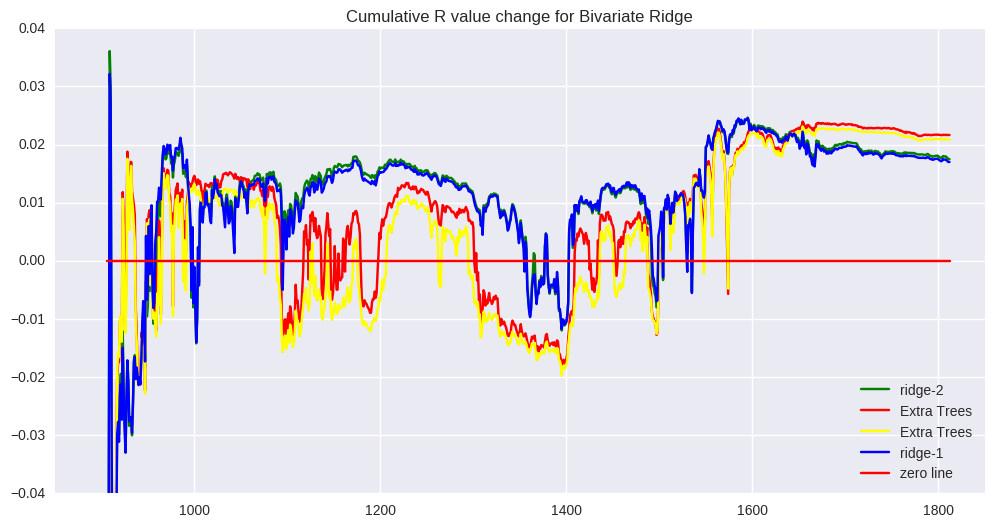

In [100]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ts_list, r2_overall_reward_list, c='green', label='ridge-2')
ax.plot(ts_list, et_overall_reward_list, c='red', label='Extra Trees')
ax.plot(ts_list, et_b_overall_reward_list, c='yellow', label='Extra Trees')
ax.plot(ts_list, r1_overall_reward_list, c='blue', label='ridge-1')
ax.plot(ts_list, [0]*len(ts_list), c='red', label='zero line')
ax.legend(loc='lower right')
ax.set_ylim([-0.04,0.04])
ax.set_xlim([850, 1850])
plt.title("Cumulative R value change for Bivariate Ridge")
plt.show()

If you look vertically you can see that some id's have a better correlation with everything.

You know what is also cool, is that you can see how consistent the correlation is across id's.

I think you can learn a lot by looking at the above.


In [ ]:
labels = []
values = []
for col in train.columns:
    labels.append(col)
    values.append(train[col].isnull().sum())
myframe = pd.DataFrame()
myframe["labels"] = labels
myframe["values"] = values


In [ ]:
blue = pd.Series(values, index = labels)
blue.sort(ascending=False)

In [ ]:

plt.subplots(figsize=(8,40))
ax = sns.barplot(x=blue , y=blue .index, palette='cubehelix')
ax.set_title('Most Number of NaNs', color='red', alpha=0.5, size=25)
ax.set_xlabel('Number of NaNs', color='green', alpha=0.5, size=30)
ax.set_ylabel('Features', color='green', alpha=0.5, size=30)

# I think fundamentals would be linear
# I think technicalas would be more noisy.


Correlation Coefficient Plot:
    Looking at the correlation of features with target

In [ ]:
mean_values = train_one.mean(axis=0)
train_one.fillna(mean_values, inplace=True)
labels = []
values = []
for c in train.columns:
    labels.append(c)
    values.append(np.corrcoef(train_one[c].values, train_one.y.values)[0,1])



In [ ]:
red = pd.Series(values, index = labels)
red.sort(ascending=False)

In [ ]:
plt.subplots(figsize=(8,40))
ax = sns.barplot(x=red , y=red .index, palette='cubehelix')
ax.set_title('Correlation features, target', color='red', alpha=0.5, size=25)
ax.set_xlabel('Correlation', color='green', alpha=0.5, size=30)
ax.set_ylabel('Features', color='green', alpha=0.5, size=30)


In [ ]:
# 'technical_30', 'technical_20', 'fundamental_11', 'technical_27', 'technical_19', 'technical_35', 'technical_36',
# 'technical_11', 'technical_2', 'technical_34', 'fundamental_53', 'fundamental_51', 'fundamental_58',

cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_27', 'technical_19', 'technical_35',
              'technical_11', 'technical_2', 'technical_34', 'fundamental_53', 'fundamental_51',
              'fundamental_58']
# Exclude 36 or 35.
# Exclude 27 or 36.
# Just exclude 36. 


temp_df = train[cols_to_use]
corrmat = temp_df.corr(method='spearman')
#Pearson correlation coefficients assume normality. Did you try spearman?
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is some negative correlation between 'technical_30' and 'technical_20

As the next step, let us build simple linear regression models using these variables alone and see how they perform.
Let us first build our models.


In [ ]:
# All you need is 30, and 20 linear regression, best outcome. 
# Leader Board Score = LB Score. 
#cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_27', 'technical_19', 'technical_35',
              'technical_11', 'technical_2', 'technical_34', 'fundamental_53', 'fundamental_51',
              'fundamental_58']

#observation = environment.reset() # Resets to first observations "view of what you can see presently"

# Get first observation
"""
env = kagglegym.make()
observation = env.reset()
train = observation.train
train.fillna(mean_values, inplace=True)
"""
environment = kagglegym.make()
observation = environment.reset()
train = observation.train
train.fillna(d_mean, inplace=True)

low_y_cut = -0.075
high_y_cut = 0.075

y_is_above_cut = (train["y"] > high_y_cut)
y_is_below_cut = (train["y"] < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)
y_is_within_cut.value_counts()

# Get first observation

lr = LinearRegression()
fit_two = lr.fit(np.array(train.loc[y_is_within_cut,'fundamental_58'].values).reshape(-1,1), train.loc[y_is_within_cut, 'y'])

while True:
    observation.features.fillna(mean_values, inplace=True)
    test_x = np.array(observation.features['fundamental_58'].values).reshape(-1,1)
    observation.target.y = fit_two.predict(test_x).clip(low_y_cut, high_y_cut)
    target = observation.target
    timestamp = observation.features["timestamp"][0]
    if timestamp % 100 == 0:
        print("Timestamp #{}".format(timestamp))
        
    observation, reward, done, info = environment.step(target)
    if done:
        break
info

# 0.020352

In [ ]:
y = train_one['y'].values
p = sns.color_palette()
plt.hist(y, bins=50, color=p[3])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of target value')
print('Target value min {0:.3f} max {1:.3f} mean {2:.3f} std {3:.3f}'.format(np.min(y), np.max(y), np.mean(y), np.std(y)))

This looks like kurtosis in returns which is normal, we do not want to predict those big movements, it is too hard, so we will cut them off for the training data. 


In [ ]:
mask[(train_one.id==5) & (train_one.timestamp<120)]
train_one.ix[mask,'timestamp'].plot()
time_mini = train_one.timestamp.loc[mask].values
for bins in [100, 250]:
    plt.figure(figsize=(15, 5))
    plt.hist(time_mini, bins=bins, color=p[4])
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Histogram of Zoomed-in Timestamp - {} bins'.format(bins))

In [ ]:
timestamp = train_one.timestamp.values
for bins in [100, 250, 500]:
    plt.figure(figsize=(15, 5))
    plt.hist(timestamp, bins=bins)
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Histogram of Timestamp - {} bins'.format(bins))

In [ ]:
time_mini = train_one.timestamp.loc[train_one.timestamp < 500].values
for bins in [100, 250]:
    plt.figure(figsize=(15, 5))
    plt.hist(time_mini, bins=bins, color=p[4])
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title('Histogram of Zoomed-in Timestamp - {} bins'.format(bins))

In [ ]:
# The count of y tapers dows throughout the day after which it picks up again the next day.

In [ ]:
# Group by timestamp and the count of time stamp
targets_in_stamp = train_one.groupby('timestamp')['y'].count()
timediff = train_one.groupby('timestamp')['y'].count().diff()
plt.figure(figsize=(8, 5))
plt.plot(targets_in_stamp)
plt.plot(timediff)
plt.xlabel('Timestamp')
plt.ylabel('Change in count since last timestamp')
plt.title('1st discrete difference of timestamp count')

In [ ]:
pd.Series(timediff[timediff > 10].index).diff()

This basically confirms that the timestamp has a time period of 100. We can see that almost all the peaks are 100 timestamps apart, with two of them being 200 timestamps apart, and two of them being 50 timestamps apart. Looking at the graph above, we can also see that in the two cases where the period is 200, there is actually a peak 100 timestamps in which is smaller than 100.

In [ ]:
print(timediff[timediff > 10].index[0])


We can approximate where the peaks will be with a function 100x + 70 (there is a gap of 100 between each peak, with an offset of 70.)
This information could be used to quite accurately predict what the count of the timestamp will be in the future.

In [ ]:
# This looks at the change of the target value over time. 

time_targets = train_one.groupby('timestamp')['y'].mean()
# For each time stamp get the y mean value. 

plt.figure(figsize=(12, 5))
plt.plot(time_targets)
plt.xlabel('Timestamp')
plt.ylabel('Mean of target')
plt.title('Change in target over time - Red lines = new timeperiod')
for i in timediff[timediff > 5].index:
    plt.axvline(x=i, linewidth=0.25, color='red')

# This plots red liines for the period start and end 

All the above show is that the target variable has been reasonably volatile over two periods. 
It also appears to me that the start of a new time period very often coincides with (at least a small) peak in the data. Anyone else see this, or am I mentally overfitting? 

I think that this graphs 2002 - 2010. 

I don't think it is 2002 and 2010 but more recent events, reason being that the fat tails are even on both
sides

"small peaks" on Target distribution plot are just artifact of data presentation.

That is true, it is not new days instead it is the compilation of assets

In [ ]:

 
 
"""In this section, we 1. Call up Function One to set up the environment and establish the feature
dataframe and then we 2. Create columns to binarily present whether an observation is Nan, if true
- See the next cell for output example and then we 3. Fill the nans with the column mean after this
we 4. Create a sum column of row nans"""

n = X.isnull().sum(axis=1) 
for c in X.columns: 
    r = pd.isnull(X.loc[:, c])
    X[c + '_nan_'] = r  
    d_mean[c + '_nan_'] = 0                                     

X_train = X.fillna(d_mean)
X_train['znull'] = n 
n = []
  
## This one below should be the only function, the only one you are feeding info. 

def smaller_train(every_nth, X_train, y_train): 
    X_train = X_train.iloc[::every_nth, :]
    y_train = y_train.to_frame().iloc[::every_nth, :]
    y_train = y_train.iloc[:,0]
    return X_train, y_train
X_train, y_train = smaller_train(5, X_train, y_train) 


# In[10]:


rfr = ExtraTreesRegressor(n_estimators=100, max_depth=3, n_jobs=-1, random_state=17, verbose=0)
fit_one = rfr.fit(X_train, y_train)

# This is the max and mins, which we cancel out. 
"""
print("Max y value in train : ",train.y.max())
print("Min y value in train : ",train.y.min())
Max y value in train :  0.0934978
Min y value in train :  -0.0860941
"""

# In[32]:

low_y_cut = -0.075
high_y_cut =  0.075
#0.075
y_is_above_cut = (observation.train.y > high_y_cut)
y_is_below_cut = (observation.train.y < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

# So the idea is to retrain this using the cuts. 

lr = LinearRegression(n_jobs=-1)
fit_two = lr.fit(np.array(observation.train[col].fillna(d_mean).loc[y_is_within_cut,
'technical_20'].values).reshape(-1,1), observation.train.loc[y_is_within_cut, 'y'])
X_train= []

ymean_dict = dict(observation.train.groupby(["id"])["y"].mean())


# In[33]:


while True:
    X_test = observation.features[col]
    #I reckoned what happened here is that the features column is a different set of data. 
    n = X_test.isnull().sum(axis=1)
    for c in X_test.columns:
        X_test[c + '_nan_'] = pd.isnull(X_test[c])
    X_test = X_test.fillna(d_mean)
    X_test['znull'] = n
    
    pred = observation.target
  
    X_test_two =  np.array(observation.features[col].fillna(d_mean)
    ['technical_20'].values).reshape(-1,1)
    
    pred['y'] = (fit_one.predict(X_test).clip(low_y_cut, high_y_cut) * 0.65) 
    + (fit_two.predict(X_test_two).clip(low_y_cut, high_y_cut) * 0.35)
    pred['y'] = pred.apply(lambda r: 0.95 * r['y'] + 0.05 * ymean_dict[r['id']] if r['id'] in ymean_dict else r['y'], axis = 1)
    pred['y'] = [float(format(x, '.6f')) for x in pred['y']]
    observation, reward, done, info = environment.step(pred)
    if done:
        print("el fin ...", info["public_score"])
        break
    if observation.features.timestamp[0] % 100 == 0:
        print(reward)
   
